
# Simple profiling for dbscan 1d implementation

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from dbscan1d import DBSCAN1D
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs


n_points = [10, 100, 1_000, 10_000, 20_000, 30_000, 40_000,]
centers = 2

In [2]:
# create tests data matrix
def create_blobs(num_points, centers):
    return make_blobs(num_points, centers=centers, n_features=1)[0]

In [3]:
# Profile
db1 = DBSCAN1D(.5, 4)
db2 = DBSCAN(.5, 4)

In [4]:
# profile each stream type with each function
df = pd.DataFrame(columns=['dbscan', 'dbscan1d'], index=n_points)
for n_point in n_points:
    print(f'on {n_point}')
    X = create_blobs(n_point, centers)
    print('starting dbscan1d')
    ti1 = %timeit -o db1.fit_predict(X)
    df.loc[n_point, 'dbscan1d'] = ti1.best
    print('starting dbscan')
    ti2 = %timeit -o db2.fit_predict(X)
    df.loc[n_point, 'dbscan'] = ti2.best
    print()
    print()

on 10
starting dbscan1d
73.6 µs ± 524 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
starting dbscan
270 µs ± 959 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


on 100
starting dbscan1d
82.5 µs ± 208 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
starting dbscan
557 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


on 1000
starting dbscan1d
254 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
starting dbscan
3.98 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


on 10000
starting dbscan1d
1.99 ms ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
starting dbscan
125 ms ± 602 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


on 20000
starting dbscan1d
4.06 ms ± 6.56 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
starting dbscan
646 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


on 30000
starting dbscan1d
6.35 ms ± 53.2 µs per loop (mean ± std. de

## Plot results
Plot results and save figure to docs

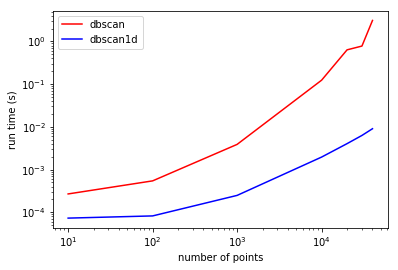

In [5]:
out_path = Path(__file__).parent / 'profile_results.png'

x = df.index.values
plt.loglog(x, df['dbscan'].values, label='dbscan', color='r')
plt.loglog(x, df['dbscan1d'].values, label='dbscan1d', color='b')

plt.xlabel('number of points')
plt.ylabel('run time (s)')

plt.legend()

plt.savefig(out_path)

plt.show()
